# The parts of the assignment has been shown below along with results, plots, and descriptions in the below cells and their outputs

In [131]:
import nltk,re
import numpy as np
from nltk.corpus import brown
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
s=brown.sents()
#len(s)
print("brown corpus imported")

brown corpus imported


# preprocessing the text (casefolding and removing numerals & special characters)

In [132]:
print("pre-processing started")
S=[[re.sub(r'[^a-z ]+','',j.lower()) for j in i] for i in s] #case-folding and removing numerals

sentences=[" ".join(i) for i in S]
print("pre-processing finished")
#sentences[0:10]

pre-processing started
pre-processing finished


# unigram model

In [133]:
from nltk import bigrams, ngrams, trigrams 
from collections import Counter
#unigrams
print("creating unigram model")
def unigram_model(sent):
    unigrams=[]
    for elem in sent:
        unigrams.append(None)
        unigrams.extend(elem.split())
        unigrams.append(None)
    unigram_counts=dict(Counter(unigrams))
    unigram_total=len(unigrams)
    for word in unigram_counts:
        unigram_counts[word]/=(unigram_total+0.0)
    return unigram_counts
unigram_counts=unigram_model(sentences)
print("finished : creating unigram model","length of unigram model",len(unigram_counts))

creating unigram model
finished : creating unigram model length of unigram model 46276


# bigram model

In [134]:
#bigrams
print("creating bigram model")
def bigram_model(sentences):
    model={}
    bigrams=[]
    for sent in sentences:
         for w1,w2 in ngrams(sent.split(),2, pad_left=True,pad_right=True):
            bigrams.append((w1,w2))
            if w1 not in model:
                model[w1]={}
            if w2 not in model[w1]:
                model[w1][w2]=0
            model[w1][w2]+=1
    for w1 in model:
        tot_count=float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2]/=tot_count
    
    return model,dict(Counter(bigrams))

bigram_counts,bigrams= bigram_model(sentences)
print("finished : creating bigram model")

creating bigram model
finished : creating bigram model


# trigram model

In [135]:
#trigram

print("creating trigram model")

def trigram_model(sentences):
    model={}
    trigrams=[]
    for sent in sentences:
         for w1,w2,w3 in ngrams(sent.split(),3, pad_left=True,pad_right=True):
            trigrams.append((w1,w2,w3))
            if (w1,w2) not in model:
                model[(w1,w2)]={}
            if w3 not in model[(w1,w2)]:
                model[(w1,w2)][w3]=0
            model[(w1,w2)][w3]+=1
    for (w1,w2) in model:
        tot_count=float(sum(model[(w1,w2)].values()))
        for w3 in model[(w1,w2)]:
            model[(w1,w2)][w3]/=tot_count
     
    return model,dict(Counter(trigrams))

def trigram_true_model(sentences):
    model={}
    for sent in sentences:
        for w1,w2,w3 in ngrams(sent.split(),3,pad_left=True,pad_right=True):
            if w1 not in model:
                model[w1]={}
            if w2 not in model[w1]:
                model[w1][w2]={}
            if w3 not in model[w1][w2]:
                model[w1][w2][w3]=0
            model[w1][w2][w3]+=1
    return model

trigram_counts,trigrams= trigram_model(sentences)
#trigram_true_counts= trigram_true_model(sentences)
#print(len(trigram_counts),len(trigram_true_counts))
print("finished : creating trigram model")

creating trigram model
finished : creating trigram model


# printing top 10 ngrams

In [136]:
print("printing top 10 unigrams in no particular order")
print([i[0] for i in Counter(unigram_counts).most_common(10)])
print("printing top 10 bigrams in no particular order")
print([i[0] for i in Counter(bigrams).most_common(10)])
print("printing top 10 trigrams in no particular order")
print([i[0] for i in Counter(trigrams).most_common(10)])

printing top 10 unigrams
[None, 'the', 'of', 'and', 'to', 'a', 'in', 'that', 'is', 'was']
printing top 10 bigrams
[('of', 'the'), (None, 'the'), ('in', 'the'), ('to', 'the'), (None, 'he'), ('on', 'the'), ('and', 'the'), (None, 'it'), ('for', 'the'), (None, 'i')]
printing top 10 trigrams
[(None, None, 'the'), (None, None, 'he'), (None, None, 'it'), (None, None, 'i'), (None, None, 'in'), (None, None, 'but'), (None, None, 'a'), (None, None, 'and'), (None, None, 'this'), (None, None, None)]


# Verify Zipf’s Law on the aforementioned 3 language models
## Verification of zipf's law in all the 3 models have been proven below by plotting frequency vs. rank plots for each of the models. 

In [137]:
from matplotlib import pyplot as plt
#sorted(d.items(), key=lambda x: x[1])
#x={'a':5,'b':2,'c':9,'d':4,'e':7}
#sorted(x.items(), key=lambda x: x[1],reverse=True)
sorted_unigram=sorted(unigram_counts.items(), key=lambda x: x[1],reverse=True)
sorted_bigram=sorted(Counter(bigrams).items(), key=lambda x: x[1],reverse=True)
sorted_trigram=sorted(Counter(trigrams).items(), key=lambda x: x[1],reverse=True)
print('series counts to plot for zipf\'s law have been calculated')

series counts to plot for zipf's law have been calculated


### Zipf's Law proof for unigram model

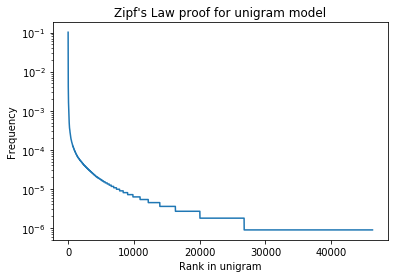

In [138]:
#zipf's law unigram
x=[]
y=[]
k=0
for i in sorted_unigram:
    k+=1
    x.append(k)
    y.append(i[1])
plt.plot(x,y)
plt.xlabel('Rank in unigram')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Zipf\'s Law proof for unigram model')
plt.show()

### Zipf's Law proof for bigram model

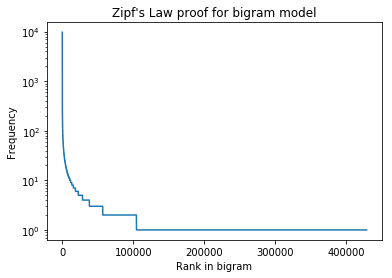

In [139]:
#zipf's law bigram
x=[]
y=[]
k=0
for i in sorted_bigram:
    k+=1
    x.append(k)
    y.append(i[1])
plt.plot(x,y)
plt.xlabel('Rank in bigram')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Zipf\'s Law proof for bigram model')
plt.show()

### Zipf's Law proof for trigram model

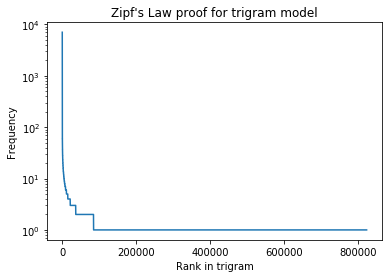

In [140]:
#zipf's law trigram
x=[]
y=[]
k=0
for i in sorted_trigram:
    k+=1
    x.append(k)
    y.append(i[1])
plt.plot(x,y)
plt.xlabel('Rank in trigram')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Zipf\'s Law proof for trigram model')
plt.show()

# (without smoothing) log-likelihood and perplexity scores for the following sentences 

In [144]:
SSS= ["he lived a good life","the man was happy","the person was good","the girl was sad","he won the war"]
for t in SSS:
    #calculating log-likelihood using unigram model 
    p=unigram_counts[None]**2
    log_LE=0
    for w in t.split():
        if w in unigram_counts:
            p*=unigram_counts[w]
            log_LE+=np.log(unigram_counts[w])
        else:
            p*=0
            log_LE=-float('inf')
    print(t,', unigram log-likelihood :',log_LE,', unigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))
    #calculating log-likelihood using bigram model 
    p=1
    log_LE=0
    for w1,w2 in ngrams(t.split(),2,pad_left=True,pad_right=True):
        if w1 in bigram_counts:
            if w2 in bigram_counts[w1]:
                p*=bigram_counts[w1][w2]
                log_LE+=np.log(bigram_counts[w1][w2])
        else:
            p*=0
            log_LE=-float('inf')
    print(t,', bigram log-likelihood :',log_LE,', bigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))
    p=1
    log_LE=0
    for w1,w2,w3 in ngrams(t.split(),3,pad_left=True,pad_right=True):
        if (w1,w2) in trigram_counts:
            if w3 in trigram_counts[(w1,w2)]:
                p*=trigram_counts[(w1,w2)][w3]
                log_LE+=np.log(trigram_counts[(w1,w2)][w3])
        else:
            p*=0
            log_LE=-float('inf')
    print(t,', trigram log-likelihood :',log_LE,', trigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))
#print([(w1,w2) for w1,w2 in ngrams(s1.split(),2,pad_left=True,pad_right=True)])

he lived a good life , unigram log-likelihood : -32.41207520101094 , unigram perplexity : 1626.0655083839695
he lived a good life , bigram log-likelihood : -27.25463796613492 , bigram perplexity : 232.97417097281271
he lived a good life , trigram log-likelihood : -14.81570447473309 , trigram perplexity : 19.35867994658659
the man was happy , unigram log-likelihood : -23.68379267807059 , unigram perplexity : 1164.8266899698374
the man was happy , bigram log-likelihood : -20.439738734958496 , bigram perplexity : 165.6595342590791
the man was happy , trigram log-likelihood : -11.31865399561388 , trigram perplexity : 16.93975961767733
the person was good , unigram log-likelihood : -23.51599675361079 , unigram perplexity : 1116.974097935782
the person was good , bigram log-likelihood : -24.216883569762338 , bigram perplexity : 425.906948832999
the person was good , trigram log-likelihood : -11.881847604897187 , trigram perplexity : 19.500925017203837
the girl was sad , unigram log-likelihoo

/home/gourabp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in power


# Language Modelling with Laplace Smoothing

In [149]:
#unigram with model with laplace smoothing
v=len(unigram_counts)
def unigram_model_laplace(sent,k):
    unigrams=[]
    for elem in sent:
        unigrams.extend(elem.split())
        unigrams.append(None)
    unigram_counts=dict(Counter(unigrams))
    unigram_total=len(unigrams)
    for word in unigram_counts:
        unigram_counts[word]=(unigram_counts[word]+k)/(unigram_total+k*v)
    return unigram_counts


#bigram model with laplace smoothing
def bigram_model_laplace(sentences,k):
    model={}
    for sent in sentences:
         for w1,w2 in ngrams(sent.split(),2, pad_left=True,pad_right=True):
            if w1 not in model:
                model[w1]={}
            if w2 not in model[w1]:
                model[w1][w2]=0
            model[w1][w2]+=1
    for w1 in model:
        tot_count=float(sum(model[w1].values()))
        for w2 in model[w1]:
            model[w1][w2]=(model[w1][w2]+k)/(tot_count+k*v)
        model[w1]['0']=(k/(k*v+tot_count))
    return model

#trigram model with laplace smoothing 
def trigram_model_laplace(sentences,k):
    model={}
    for sent in sentences:
         for w1,w2,w3 in ngrams(sent.split(),3, pad_left=True,pad_right=True):
            if (w1,w2) not in model:
                model[(w1,w2)]={}
            if w3 not in model[(w1,w2)]:
                model[(w1,w2)][w3]=0
            model[(w1,w2)][w3]+=1
    for (w1,w2) in model:
        tot_count=float(sum(model[(w1,w2)].values()))
        for w3 in model[(w1,w2)]:
            model[(w1,w2)][w3]=(model[(w1,w2)][w3]+k)/(tot_count+k*v)
        model[(w1,w2)]['0']=(k/(k*v+tot_count))
    return model

In [150]:
k_list=[1.0,1e-1,1e-2,1e-3,1e-4]
print(k_list)
for k_para in k_list:
    print('k',k_para)
    unigram_counts=unigram_model_laplace(sentences,k_para)
    bigram_counts=bigram_model_laplace(sentences,k_para)
    trigram_counts=trigram_model_laplace(sentences,k_para)
    for t in SSS:
        #calculating log-likelihood using unigram model 
        p=unigram_counts[None]**2
        log_LE=0
        for w in t.split():
            if w in unigram_counts:
                p*=unigram_counts[w]
                log_LE+=np.log(unigram_counts[w])
            else:
                p*=0
                log_LE=-float('inf')
        print(t,', unigram log-likelihood :',log_LE,', unigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))
        #calculating log-likelihood using bigram model 
        p=1
        log_LE=0
        for w1,w2 in ngrams(t.split(),2,pad_left=True,pad_right=True):
            if w1 in bigram_counts:
                if w2 in bigram_counts[w1]:
                    p*=bigram_counts[w1][w2]
                    log_LE+=np.log(bigram_counts[w1][w2])
                else:
                    p*=bigram_counts[w1]['0']
                    log_LE+=np.log(bigram_counts[w1]['0'])
            else:
                p*=0
                log_LE=-float('inf')
        print(t,', bigram log-likelihood :',log_LE,', bigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))
        p=1
        log_LE=0
        for w1,w2,w3 in ngrams(t.split(),3,pad_left=True,pad_right=True):
            if (w1,w2) in trigram_counts:
                if w3 in trigram_counts[(w1,w2)]:
                    p*=trigram_counts[(w1,w2)][w3]
                    log_LE+=np.log(trigram_counts[(w1,w2)][w3])
                else:
                    p*=trigram_counts[(w1,w2)]['0']
                    log_LE+=np.log(trigram_counts[(w1,w2)]['0'])
            else:
                p*=0
                log_LE=-float('inf')
        print(t,', trigram log-likelihood :',log_LE,', trigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))

[1.0, 0.1, 0.01, 0.001, 0.0001]
k 1.0
he lived a good life , unigram log-likelihood : -32.350984616520726 , unigram perplexity : 2111.13408931043
he lived a good life , bigram log-likelihood : -43.47377580757895 , bigram perplexity : 5971.510333136184
he lived a good life , trigram log-likelihood : -60.512515603049295 , trigram perplexity : 180322.66719347902
the man was happy , unigram log-likelihood : -23.6329801139747 , unigram perplexity : 1618.4506485624445
the man was happy , bigram log-likelihood : -32.90789968237665 , bigram perplexity : 3740.5013064884397
the man was happy , trigram log-likelihood : -46.202595150970346 , trigram perplexity : 103844.38793546404
the person was good , unigram log-likelihood : -23.469192065468917 , unigram perplexity : 1553.518393328453
the person was good , bigram log-likelihood : -35.902087238597424 , bigram perplexity : 7907.143019776081
the person was good , trigram log-likelihood : -49.935666279481424 , trigram perplexity : 264056.02350740304

/home/gourabp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in power


he lived a good life , unigram log-likelihood : -32.1698419745489 , unigram perplexity : 2005.0880965273632
he lived a good life , bigram log-likelihood : -35.34643587665309 , bigram perplexity : 1175.3099456561158
he lived a good life , trigram log-likelihood : -54.37862420241553 , trigram perplexity : 52877.05815366877
the man was happy , unigram log-likelihood : -23.48981023634836 , unigram perplexity : 1531.9491562771632
the man was happy , bigram log-likelihood : -26.396045776139218 , bigram perplexity : 734.3688655726088
the man was happy , trigram log-likelihood : -37.817049152444525 , trigram perplexity : 12762.446724818836
the person was good , unigram log-likelihood : -23.322418231659988 , unigram perplexity : 1469.1630454179433
the person was good , bigram log-likelihood : -29.863284926390165 , bigram perplexity : 1747.2898888454338
the person was good , trigram log-likelihood : -43.94750927320131 , trigram perplexity : 59093.56524128374
the girl was sad , unigram log-likeli

# Good Turing Smoothing
### Why good turing is not possible for unigram model ?
Ans : Because, in unigram model, the number of possible unigrams never seen in the corpus (occurring 0 times in the corpus) is infinite. So one can't decide on giving any probability value to unseen unigrams.

In [173]:
v=len(unigram_counts)

#bigram model with Good Turing smoothing
def bigram_model_goodturing():
    model={}
    count_numbers=dict(Counter(bigrams.values()))
    # calculating effective counts
    eff_count_0=count_numbers[1]/(v*v-len(bigrams))
    eff_count_sum=eff_count_0+sum(bigrams.values())
    for i in bigrams:
         model[i]=bigrams[i]/eff_count_sum
    model['0']=eff_count_0/eff_count_sum
    return model

#trigram model with Good Turing smoothing 
def trigram_model_goodturing():
    model={}
    count_numbers=dict(Counter(trigrams.values()))
    # calculating effective counts
    eff_count_0=count_numbers[1]/(v*v-len(trigrams))
    eff_count_sum=eff_count_0+sum(trigrams.values())
    for i in trigrams:
         model[i]=trigrams[i]/eff_count_sum
    model['0']=eff_count_0/eff_count_sum
    return model

In [174]:
bigram_counts=bigram_model_goodturing()
trigram_counts=trigram_model_goodturing()
print('good turing models created')

good turing models created


In [175]:
print('Using Good Turing Smoothing')
for t in SSS:
    #calculating log-likelihood using bigram model 
    p=1
    log_LE=0
    for w1,w2 in ngrams(t.split(),2,pad_left=True,pad_right=True):
        if (w1,w2) in bigram_counts:
            p*=bigram_counts[(w1,w2)]
            log_LE+=np.log(bigram_counts[(w1,w2)])
        else:
            p*=bigram_counts['0']
            log_LE+=np.log(bigram_counts['0'])
    print(t,', bigram log-likelihood :',log_LE,', bigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))
    p=1
    log_LE=0
    for w1,w2,w3 in ngrams(t.split(),3,pad_left=True,pad_right=True):
        if (w1,w2,w3) in trigram_counts:
            p*=trigram_counts[(w1,w2,w3)]
            log_LE+=np.log(trigram_counts[(w1,w2,w3)])
        else:
            p*=bigram_counts['0']
            log_LE+=np.log(bigram_counts['0'])
    print(t,', trigram log-likelihood :',log_LE,', trigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))

he lived a good life , bigram log-likelihood : -62.32324015897015 , bigram perplexity : 259016.7555400617
he lived a good life , trigram log-likelihood : -109.0407375351086 , trigram perplexity : 2959089649.1667886
the man was happy , bigram log-likelihood : -46.83262157678976 , bigram perplexity : 121559.04541333333
the man was happy , trigram log-likelihood : -73.67434762027146 , trigram perplexity : 99790835.16669808
the person was good , bigram log-likelihood : -50.4419704871338 , bigram perplexity : 299686.6242315574
the person was good , trigram log-likelihood : -86.29144385142301 , trigram perplexity : 2338699781.269478
the girl was sad , bigram log-likelihood : -61.06850010175598 , bigram perplexity : 4270002.733800854
the girl was sad , trigram log-likelihood : -85.69429014416852 , trigram perplexity : 2014370418.3256986
he won the war , bigram log-likelihood : -48.72719916404465 , bigram perplexity : 195203.8724257769
he won the war , trigram log-likelihood : -68.129374533677

# Interpolation Method for bigram model

In [177]:
#interpolation method for the bigram model
unigram_counts=unigram_model(sentences)
bigram_counts,bigrams= bigram_model(sentences)
lamda_list=[0.2,0.5,0.8]
print('using interpolation method for bigram model')
for lamda in lamda_list:
    print('choosing interpolation parameter lambda =',lamda)
    for t in SSS:
        #calculating log-likelihood using bigram model 
        p=unigram_counts[None]
        log_LE=np.log(unigram_counts[None])
        for w1,w2 in ngrams(t.split(),2,pad_left=True,pad_right=True):
            if w1 in bigram_counts:
                if w2 in bigram_counts[w1]:
                    p*=(lamda*bigram_counts[w1][w2]+(1-lamda)*unigram_counts[w2])
                    log_LE+=np.log(bigram_counts[w1][w2]*unigram_counts[w2])
            else:
                p*=0
                log_LE=-float('inf')
        print(t,', bigram log-likelihood :',log_LE,', bigram perplexity :',np.power(p,(np.divide(-1.0,len(t.split())))))

using interpolation method for bigram model
choosing interpolation parameter lambda = 0.2
he lived a good life , bigram log-likelihood : -64.22423085291109 , bigram perplexity : 829.9035379481999
the man was happy , bigram log-likelihood : -48.68104909879432 , bigram perplexity : 711.9448770204439
the person was good , bigram log-likelihood : -52.29039800913836 , bigram perplexity : 985.6363544447222
the girl was sad , bigram log-likelihood : -34.557580408423036 , bigram perplexity : 120.91969362885105
he won the war , bigram log-likelihood : -50.57562668604921 , bigram perplexity : 955.6344024533873
choosing interpolation parameter lambda = 0.5
he lived a good life , bigram log-likelihood : -64.22423085291109 , bigram perplexity : 530.3745274133142
the man was happy , bigram log-likelihood : -48.68104909879432 , bigram perplexity : 464.55647442041476
the person was good , bigram log-likelihood : -52.29039800913836 , bigram perplexity : 861.2101425776959
the girl was sad , bigram log-l

In [180]:
#fp=open('test_examples.txt')
#abc=fp.read()
#print(abc.split('\n'))

['he lived a good life', 'the man was happy', 'the person was good', 'the girl was sad', 'he won the war']
